In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
import seaborn as sns
import requests
from pprint import pprint
import copy
import plotly.express as px
import matplotlib.dates as mdates
fmt = mdates.DateFormatter('%d-%b\n%Y')  
import matplotlib.pyplot as plt
import warnings
from translate import Translator
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('Data_COV_w51.csv', encoding='latin-1')
df

,ID,Patient_id,Week_ID,Week,Year,Date_Entry,Date_Exit,DOH,Sex,Age,...,Hosp_Bed_W52,Hosp_Bed_W53,ICU_IN,ICU_OUT,ICU_total,Cov_Noso,Cov_Rap,Cov_Foreign,Cov_Country,Cov_NH
0,1,98736006,1,29,2021,22.07.2021 10:35,8/26/2021,NaN,1.0,53,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN
1,2,170673,1,29,2021,7/25/2021,8/10/2021,NaN,1.0,69,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN
2,3,351879,1,29,2021,22.07.2021 07:21,8/27/2021,NaN,1.0,59,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN
3,4,533807,1,29,2021,19.07.2021 07:10,8/19/2021,NaN,1.0,61,...,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,NaN,NaN
4,5,1057080,1,29,2021,23.07.2021 08:05,NaN,NaN,0.0,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,329691,23,51,2021,23/12/2021,NaN,NaN,0.0,85,...,0.0,NaN,NaN,NaN,NaN,0,0.0,0.0,0,0.0
941,942,443445,23,51,2021,21/12/2021,27/12/2021,NaN,0.0,74,...,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,0,0.0
942,943,98773962,23,51,2021,23/12/2021,27/12/2021,NaN,1.0,52,...,NaN,NaN,NaN,NaN,NaN,0,2.0,1.0,61,0.0
943,944,398877,23,51,2021,22/12/2021,24/12/2021,NaN,1.0,85,...,0.0,NaN,NaN,NaN,NaN,0,0.0,0.0,0,0.0


In [27]:
valid_cols = [c for c in df.columns if not df[c].isna().all()]
df = df[valid_cols]

In [28]:
# del df['first_name']

In [29]:
df

,ID,Patient_id,Week_ID,Week,Year,Date_Entry,Date_Exit,DOH,Sex,Age,...,Hosp_Bed_W50,Hosp_Bed_W51,Hosp_Bed_W52,ICU_IN,ICU_OUT,Cov_Noso,Cov_Rap,Cov_Foreign,Cov_Country,Cov_NH
0,1,98736006,1,29,2021,22.07.2021 10:35,8/26/2021,NaN,1.0,53,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN
1,2,170673,1,29,2021,7/25/2021,8/10/2021,NaN,1.0,69,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN
2,3,351879,1,29,2021,22.07.2021 07:21,8/27/2021,NaN,1.0,59,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN
3,4,533807,1,29,2021,19.07.2021 07:10,8/19/2021,NaN,1.0,61,...,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,NaN,NaN
4,5,1057080,1,29,2021,23.07.2021 08:05,NaN,NaN,0.0,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,329691,23,51,2021,23/12/2021,NaN,NaN,0.0,85,...,NaN,0.0,0.0,NaN,NaN,0,0.0,0.0,0,0.0
941,942,443445,23,51,2021,21/12/2021,27/12/2021,NaN,0.0,74,...,NaN,0.0,NaN,NaN,NaN,0,0.0,0.0,0,0.0
942,943,98773962,23,51,2021,23/12/2021,27/12/2021,NaN,1.0,52,...,NaN,0.0,NaN,NaN,NaN,0,2.0,1.0,61,0.0
943,944,398877,23,51,2021,22/12/2021,24/12/2021,NaN,1.0,85,...,NaN,0.0,0.0,NaN,NaN,0,0.0,0.0,0,0.0


In [30]:
df['Date_Entry'] = pd.to_datetime(df.Date_Entry,errors='coerce')
df['Date_Exit'] = pd.to_datetime(df.Date_Exit,errors='coerce')

In [31]:
# df[['date_entry','Date_Entry', 'date_exit', 'Date_Exit']]
df

,ID,Patient_id,Week_ID,Week,Year,Date_Entry,Date_Exit,DOH,Sex,Age,...,Hosp_Bed_W50,Hosp_Bed_W51,Hosp_Bed_W52,ICU_IN,ICU_OUT,Cov_Noso,Cov_Rap,Cov_Foreign,Cov_Country,Cov_NH
0,1,98736006,1,29,2021,2021-07-22 10:35:00,2021-08-26,NaN,1.0,53,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN
1,2,170673,1,29,2021,2021-07-25 00:00:00,2021-08-10,NaN,1.0,69,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN
2,3,351879,1,29,2021,2021-07-22 07:21:00,2021-08-27,NaN,1.0,59,...,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN
3,4,533807,1,29,2021,2021-07-19 07:10:00,2021-08-19,NaN,1.0,61,...,NaN,NaN,NaN,NaN,NaN,1,NaN,0.0,NaN,NaN
4,5,1057080,1,29,2021,2021-07-23 08:05:00,NaT,NaN,0.0,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,941,329691,23,51,2021,2021-12-23 00:00:00,NaT,NaN,0.0,85,...,NaN,0.0,0.0,NaN,NaN,0,0.0,0.0,0,0.0
941,942,443445,23,51,2021,2021-12-21 00:00:00,2021-12-27,NaN,0.0,74,...,NaN,0.0,NaN,NaN,NaN,0,0.0,0.0,0,0.0
942,943,98773962,23,51,2021,2021-12-23 00:00:00,2021-12-27,NaN,1.0,52,...,NaN,0.0,NaN,NaN,NaN,0,2.0,1.0,61,0.0
943,944,398877,23,51,2021,2021-12-22 00:00:00,2021-12-24,NaN,1.0,85,...,NaN,0.0,0.0,NaN,NaN,0,0.0,0.0,0,0.0


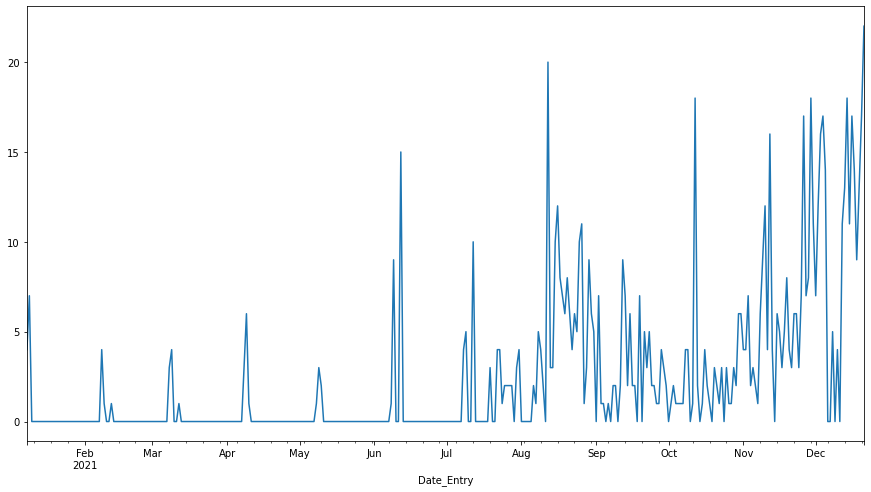

In [32]:
df.set_index('Date_Entry').loc[:'2021-12-21'].resample('D').count().Week.plot(figsize=(15,8));

In [33]:
df.set_index('Date_Entry').loc[:'2021-12-21'].to_csv('Data_COV_w51_clean.csv')